In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns

In [2]:
#Calculamos los parámetros para calcular los parámetros de escalamiento y el valor de theta correspondiente al percentil .95
muestras = 8
grupos = 6
n = grupos-1
m = muestras*grupos-grupos
p = 4#variables
phi = 2*np.arcsin(np.sqrt((max(p,n)-.5)/(m+n-1)))
lamb = 2*np.arcsin(np.sqrt((min(p,n)-.5)/(m+n-1)))

In [3]:
#Calculamos los parámetros de escalamiento
mu = 2*np.log(np.tan((phi+lamb)/2))
sigma = np.cbrt(16/((m+n-1)*(m+n-1)*np.sin(phi+lamb)*np.sin(phi+lamb)*np.sin(phi)*np.sin(lamb)))

In [4]:
#Calculamos el valor de theta correspondiente al percentil .95
theta_TW = np.exp(mu+.9793*sigma)/(1+np.exp(mu+.9793*sigma))
theta_TW

0.3838582441850831

In [5]:
#Recibimos los datos de educación, ingresos y deuda
datos = [[[45000,15000],[46000,24000],[52000,22000],[53000,8000],[59000,13000]],[[41000,30000],[44000,35000],[44000,22000],[45000,15000],[55000,43000],[61000,32000],[62000,34000],[63000,60000]],[[74000,40000],[51000,45000],[52000,34000],[54000,24000],[64000,55000],[68000,65000],[79000,40000],[84000,75000]]]

In [8]:
size = [5,8,8]#tamaño de cada grupo de educacion
N = 21#numero de personas totales
#Calculamos la suma total de ingresos anuales y deuda total 
suma = np.sum(datos[0],axis=0)+np.sum(datos[1],axis=0)+np.sum(datos[2],axis=0)
suma = np.array(suma,dtype='d')
suma = suma.reshape(2,1)
parcial = np.zeros(6,dtype='d').reshape(3,2,1)#aqui almacenaremos las sumas de ambas variables en los 3 grupos
#Calculamos las sumas dentro de cada grupo de los valores de ingresos totales y deuda total
for i in range(3):
    parcial[i] = np.sum(datos[i],axis=0).reshape(2,1)
    parcial[i] = parcial[i].reshape(2,1)
H = np.zeros(4).reshape(2,2)
#Calculamos la matriz H
for i in range(3):
    H = H + parcial[i].dot(np.transpose(parcial[i]))/size[i]
H = H - suma.dot(np.transpose(suma))/N
E = np.zeros(4,dtype='d').reshape(2,2)
#Calculamos la matriz E
for i in range(3):
    for j in range(size[i]):
        y = datos[i][j]
        y = np.array(y,dtype='d').reshape(2,1)
        E = E + y.dot(np.transpose(y))
    E = E - parcial[i].dot(np.transpose(parcial[i]))/size[i]

[[1196000.]
 [ 731000.]]
[[6.81150476e+10 4.16321905e+10]
 [4.16321905e+10 2.54457619e+10]]


In [10]:
#Matrices H y E
print(H)
print(E)

[[1.00257738e+09 1.46143452e+09]
 [1.46143452e+09 2.93966310e+09]]
[[1.868375e+09 1.357375e+09]
 [1.357375e+09 3.427575e+09]]


In [9]:
#Calculamos el estadístico de la prueba derivada de Tracy-Widom
matrix = np.linalg.inv(H+E).dot(E)
eigval,eigvec = np.linalg.eigh(matrix)
theta_obs = eigval[1]
print(theta_obs)

0.8471473714139207


In [11]:
#parámetros para calcular el valor correspondiente al percentil .95 de la distribución del estadístico anterior
total = 21
grupos = 3
n = grupos-1#numero de grupos menos 1 
m = total-grupos
p = 2#variables
phi = 2*np.arcsin(np.sqrt((max(p,n)-.5)/(m+n-1)))
lamb = 2*np.arcsin(np.sqrt((min(p,n)-.5)/(m+n-1)))

In [12]:
#parámetros de escalamiento
mu = 2*np.log(np.tan((phi+lamb)/2))
sigma = np.cbrt(16/((m+n-1)*(m+n-1)*np.sin(phi+lamb)*np.sin(phi+lamb)*np.sin(phi)*np.sin(lamb)))

In [13]:
#Valor correspondiente al percentil .95
theta_TW = np.exp(mu+.9793*sigma)/(1+np.exp(mu+.9793*sigma))
theta_TW

0.4173852277474413

In [99]:
#Calculamos el estadístico de Wilks
wilks = np.linalg.det(E)/np.linalg.det(E+H)
wilks
#rechazamos Ho si wilks es menor o igual al valor de tabla W(.05,2,2,17)=.581

0.4440744245518832

In [100]:
#Calculamos el estadístico de Lawley-Hotelling
k = 3
ve = N-k
vh = k-1
LawleyHotelling = (ve/vh)*(np.linalg.inv(E).dot(H)).trace()
LawleyHotelling
#Rechazamos Ho si el estadístico es mayor al valor de tabla LH(2,2,18)=6.1932

9.290723804385475

In [14]:
#Función de la ley del semicírculo
def f(x):
    return 1/np.pi * np.sqrt(2-x**2) 

In [40]:
#Arreglos donde almacenaremos los valores de los eigenvalores y del estadístico R_i
eig1 = []
eig2 = []
eig3 = []
eig4 = []
eig5 = []
eig6 = []
eig7 = []
eig8 = []
eig9 = []
eig10 = []
R1 = []
R2 = []
R3 = []
R4 = []
R5 = []
R6 = []
R7 = []
R8 = []

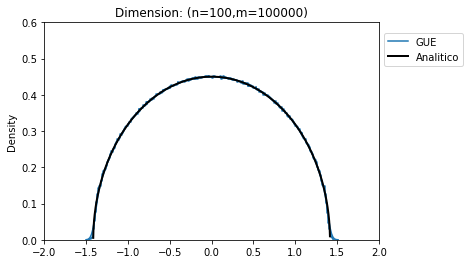

In [41]:
n = 100#dimensión de las matrices
m = 100000#matrices a generar
eig_GUE = []
for i in range(m):
    #Generamos una matriz GUE cuya matriz de covarianzas tiene 1/n en la diagonal
    H_GUE = np.sqrt(1/(n))*(np.random.normal(size=(n, n))+np.random.normal(size=(n, n))*1j)
    Hsy_GUE = (H_GUE + np.transpose(H_GUE).conjugate())/2.
    w_GUE,v_GUE = LA.eigh(Hsy_GUE)#extraemos sus eigenvalores y eigenvectores
    eig_GUE.append(w_GUE)#agregamos los eigenvalores al vector que los contendrá a todos
    w_GUE = np.sort(w_GUE)
    w_GUE = np.flip(w_GUE)
    #Almacenamos los 10 eigenvalores más grandes en su arreglo correspondiente
    eig1.append(w_GUE[0])
    eig2.append(w_GUE[1])
    eig3.append(w_GUE[2])
    eig4.append(w_GUE[3])
    eig5.append(w_GUE[4])
    eig6.append(w_GUE[5])
    eig7.append(w_GUE[6])
    eig8.append(w_GUE[7])
    eig9.append(w_GUE[8])
    eig10.append(w_GUE[9])
    #Calculamos el estadístio R_i
    R1.append((w_GUE[0]-w_GUE[1])/(w_GUE[1]-w_GUE[2]))
    R2.append(max(R1[i],(w_GUE[1]-w_GUE[2])/(w_GUE[2]-w_GUE[3])))
    R3.append(max(R2[i],(w_GUE[2]-w_GUE[3])/(w_GUE[3]-w_GUE[4])))
    R4.append(max(R3[i],(w_GUE[3]-w_GUE[4])/(w_GUE[4]-w_GUE[5])))
    R5.append(max(R4[i],(w_GUE[4]-w_GUE[5])/(w_GUE[5]-w_GUE[6])))
    R6.append(max(R5[i],(w_GUE[5]-w_GUE[6])/(w_GUE[6]-w_GUE[7])))
    R7.append(max(R6[i],(w_GUE[6]-w_GUE[7])/(w_GUE[7]-w_GUE[8])))
    R8.append(max(R7[i],(w_GUE[7]-w_GUE[8])/(w_GUE[8]-w_GUE[9])))
#Pasamos todos los arreglos/listas a un formato de array
E1 = np.array(eig1).flatten()
E2 = np.array(eig2).flatten()
E3 = np.array(eig3).flatten()
E4 = np.array(eig4).flatten()
E5 = np.array(eig5).flatten()
E6 = np.array(eig6).flatten()
E7 = np.array(eig7).flatten()
E8 = np.array(eig8).flatten()
E9 = np.array(eig9).flatten()
E10 = np.array(eig10).flatten()
R1 = np.array(R1).flatten()
R2 = np.array(R2).flatten()
R3 = np.array(R3).flatten()
R4 = np.array(R4).flatten()
R5 = np.array(R5).flatten()
R6 = np.array(R6).flatten()
R7 = np.array(R7).flatten()
R8 = np.array(R8).flatten()
GUE = np.sort(np.array(eig_GUE).flatten())
GUE = GUE/np.sqrt(2)#escalamos los eigenvalores 
#Mostramos la densidad de la distribución de los eigenvalores junto a la ley del semicírculo
sns.histplot(data=GUE,stat="density", element="step", fill=False,kde=True, label='GUE')
eps = 0.0001
t = np.arange(-np.sqrt(2)+eps, np.sqrt(2)-eps, 0.001)
plt.plot(t, f(t), 'k',linewidth=2,label=r'Analitico')
plt.title('Dimension: (n='+str(n)+',m='+str(m)+')')
plt.xlim([-2,2])
plt.ylim([0,0.6])
plt.legend(loc='upper left',bbox_to_anchor = (1, .975)) 

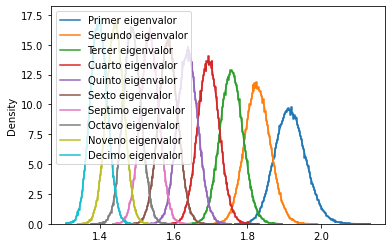

In [42]:
#Mostramos las distribuciones de los 10 eigenvalores más grandes
sns.histplot(data=E1,stat="density", element="step", fill=False,kde=True, label='Primer eigenvalor')
sns.histplot(data=E2,stat="density", element="step", fill=False,kde=True, label='Segundo eigenvalor')
sns.histplot(data=E3,stat="density", element="step", fill=False,kde=True, label='Tercer eigenvalor')
sns.histplot(data=E4,stat="density", element="step", fill=False,kde=True, label='Cuarto eigenvalor')
sns.histplot(data=E5,stat="density", element="step", fill=False,kde=True, label='Quinto eigenvalor')
sns.histplot(data=E6,stat="density", element="step", fill=False,kde=True, label='Sexto eigenvalor')
sns.histplot(data=E7,stat="density", element="step", fill=False,kde=True, label='Septimo eigenvalor')
sns.histplot(data=E8,stat="density", element="step", fill=False,kde=True, label='Octavo eigenvalor')
sns.histplot(data=E9,stat="density", element="step", fill=False,kde=True, label='Noveno eigenvalor')
sns.histplot(data=E10,stat="density", element="step", fill=False,kde=True, label='Decimo eigenvalor')
plt.legend(loc = 'upper left')

<AxesSubplot:ylabel='Density'>

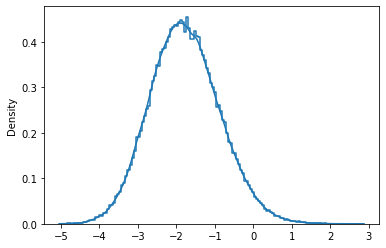

In [43]:
#Mostramos la distribución del eigenvalor más grande centrado y escalado para observar su relación con la 
#distribución Tracy-Widom con beta=2
TW =(E1-2)*np.cbrt(10000)
sns.histplot(data=TW,stat="density", element="step", fill=False,kde=True, label='Primer eigenvalor')

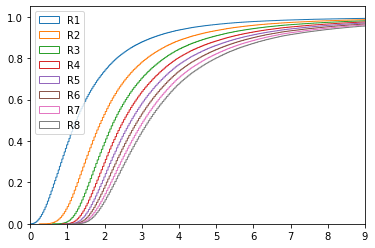

In [44]:
#Graficamos las distribuciones acumuladas estimadas de los estadísticos de prueba R_i 
T1 = plt.hist(R1,density=True, histtype="step", bins =3000, label='R1',cumulative=True)
T2 = plt.hist(R2,density=True, histtype="step", bins =3000, label='R2',cumulative=True)
T3 = plt.hist(R3,density=True, histtype="step", bins =3000, label='R3',cumulative=True)
T4 = plt.hist(R4,density=True, histtype="step", bins =3000, label='R4',cumulative=True)
T5 = plt.hist(R5,density=True, histtype="step", bins =3000, label='R5',cumulative=True)
T6 = plt.hist(R6,density=True, histtype="step", bins =3000, label='R6',cumulative=True)
T7 = plt.hist(R7,density=True, histtype="step", bins =3000, label='R7',cumulative=True)
T8 = plt.hist(R8,density=True, histtype="step", bins =3000, label='R8',cumulative=True)
plt.xlim([0,9])
plt.legend(loc='upper left')

In [45]:
from tabulate import tabulate

In [46]:
tabla = np.zeros(11*9).reshape(11,9)
pvalor = [.15,.10,.09,.08,.07,.06,.05,.04,.03,.02,.01]#lista de los percetiles
fila = 0
for pv in pvalor:#pv es el percentil que vamos a calcular para cada distribucion de los estadisticos de prueba R
    #Tomamos el índice tal que la distribución acumulada de T1 hasta ese punto se aprece más a 1-pv
    Arg = np.argmin(np.abs(T1[0]-1+pv))
    #agregamos el valor del eje x que le corresponde a ese indice, es decir el argumento cuyo valor en T1 es más 
    #parecido a 1-pv, el percentil correspondiente
    tabla[fila,1] = T1[1][Arg]
    Arg = np.argmin(np.abs(T2[0]-1+pv))
    tabla[fila,2] = T2[1][Arg]
    Arg = np.argmin(np.abs(T3[0]-1+pv))
    tabla[fila,3] = T3[1][Arg]
    Arg = np.argmin(np.abs(T4[0]-1+pv))
    tabla[fila,4] = T4[1][Arg]
    Arg = np.argmin(np.abs(T5[0]-1+pv))
    tabla[fila,5] = T5[1][Arg]
    Arg = np.argmin(np.abs(T6[0]-1+pv))
    tabla[fila,6] = T6[1][Arg]
    Arg = np.argmin(np.abs(T7[0]-1+pv))
    tabla[fila,7] = T7[1][Arg]
    Arg = np.argmin(np.abs(T8[0]-1+pv))
    tabla[fila,8] = T8[1][Arg]
    tabla[fila,0] = pv*100
    fila = fila+1

In [47]:
#Mostramos la tabla de significancias
print(tabulate(tabla,headers=["%\k1-k0","1","2","3","4","5","6","7","8"]))

  %\k1-k0        1         2         3         4         5         6         7         8
---------  -------  --------  --------  --------  --------  --------  --------  --------
       15  2.68481   3.5708    4.06685   4.50639   4.80302   5.09538   5.35738   5.62055
       10  3.29652   4.21487   4.82221   5.29771   5.66884   5.99861   6.29728   6.59804
        9  3.45749   4.40431   5.04882   5.5238    5.93236   6.26205   6.56045   6.86121
        8  3.61847   4.63163   5.27542   5.78757   6.19587   6.56313   6.89881   7.19958
        7  3.84383   4.89683   5.5398    6.08902   6.53467   6.90184   7.27477   7.61313
        6  4.10139   5.19992   5.87971   6.50352   6.94875   7.35345   7.72592   8.06428
        5  4.42334   5.57879   6.29516   6.9557    7.47577   7.88033   8.25226   8.62822
        4  4.84188   6.07131   6.86168   7.59629   8.11573   8.55775   9.00417   9.38013
        3  5.42139   6.75327   7.69258   8.42529   9.01919   9.49861   9.94407  10.3952
        2  6.35504   7